In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
dataset = pd.read_csv('/content/train_data_cleaned (1).csv')

In [ ]:
dataset.head()

,Customer_ID,outlet_city_0,outlet_city_1,outlet_city_2,outlet_city_3,outlet_city_4,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,0,0,0,0,1,1209.60,756.00,5292.00,4
1,10178643.0,0,0,0,1,0,1590.12,1060.08,6007.12,1
2,10513916.0,0,0,0,1,1,2288.88,1481.04,9155.52,4
3,10334589.0,0,0,0,1,1,2274.94,1739.66,9099.76,4
4,10458365.0,0,0,0,0,1,2345.49,2069.55,9243.99,4


In [ ]:
X = dataset[['luxury_sales', 'fresh_sales', 'dry_sales','outlet_city_0','outlet_city_1','outlet_city_2','outlet_city_3','outlet_city_4']]
y = dataset["cluster_category"]

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(dataset[['luxury_sales', 'fresh_sales', 'dry_sales']])
# Creating a DataFrame with the scaled data and original column names
scaled_df = pd.DataFrame(scaled_data, columns=['luxury_sales', 'fresh_sales', 'dry_sales'], index=dataset.index)

# Updating the original DataFrame with the scaled values
dataset[['luxury_sales', 'fresh_sales', 'dry_sales']] = scaled_df[['luxury_sales', 'fresh_sales', 'dry_sales']]
dataset.head()

,Customer_ID,outlet_city_0,outlet_city_1,outlet_city_2,outlet_city_3,outlet_city_4,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,0,0,0,0,1,-0.439830,-0.449339,0.324965,4
1,10178643.0,0,0,0,1,0,-0.074139,-0.391966,0.452208,1
2,10513916.0,0,0,0,1,1,0.597391,-0.312540,1.012410,4
3,10334589.0,0,0,0,1,1,0.583994,-0.263745,1.002488,4
4,10458365.0,0,0,0,0,1,0.651795,-0.201502,1.028152,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f"Training Accuracy: {train_accuracy:}")
print(f"Test Accuracy: {test_accuracy:}")

Training Accuracy: 0.8607278090153684
Test Accuracy: 0.8595570228253663


In [ ]:
print("\nClassification Report (Train Set):\n", classification_report(y_train, y_train_pred))


Classification Report (Train Set):
               precision    recall  f1-score   support

           1       0.98      0.77      0.86    132007
           2       0.79      0.99      0.88    108693
           3       1.00      0.41      0.59     16835
           4       0.79      0.99      0.88    120843
           5       0.71      0.89      0.79     20507
           6       0.98      0.77      0.87    118476

    accuracy                           0.86    517361
   macro avg       0.87      0.80      0.81    517361
weighted avg       0.88      0.86      0.86    517361



In [ ]:
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))


Classification Report (Test Set):
               precision    recall  f1-score   support

           1       0.98      0.77      0.86     56972
           2       0.79      0.99      0.88     46367
           3       1.00      0.42      0.59      7277
           4       0.79      0.99      0.88     51589
           5       0.71      0.89      0.79      8789
           6       0.98      0.77      0.86     50733

    accuracy                           0.86    221727
   macro avg       0.87      0.80      0.81    221727
weighted avg       0.88      0.86      0.86    221727




Confusion Matrix (Train Set):


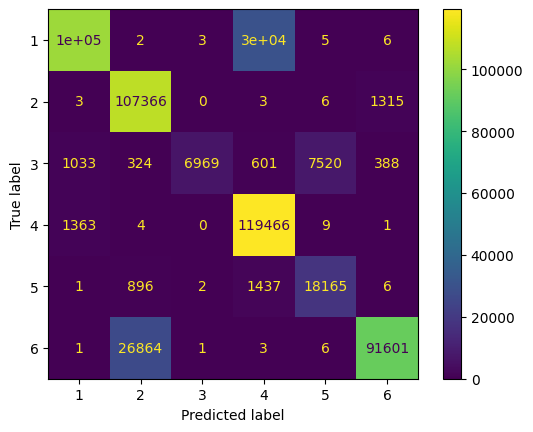

In [ ]:
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=gnb.classes_)
print("\nConfusion Matrix (Train Set):")
disp_train.plot()


Confusion Matrix (Test Set):


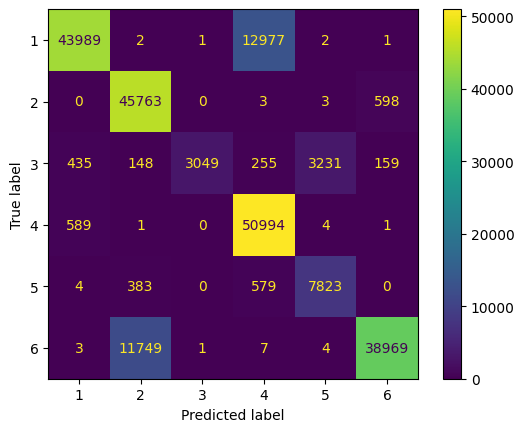

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=gnb.classes_)
print("\nConfusion Matrix (Test Set):")
disp_test.plot()

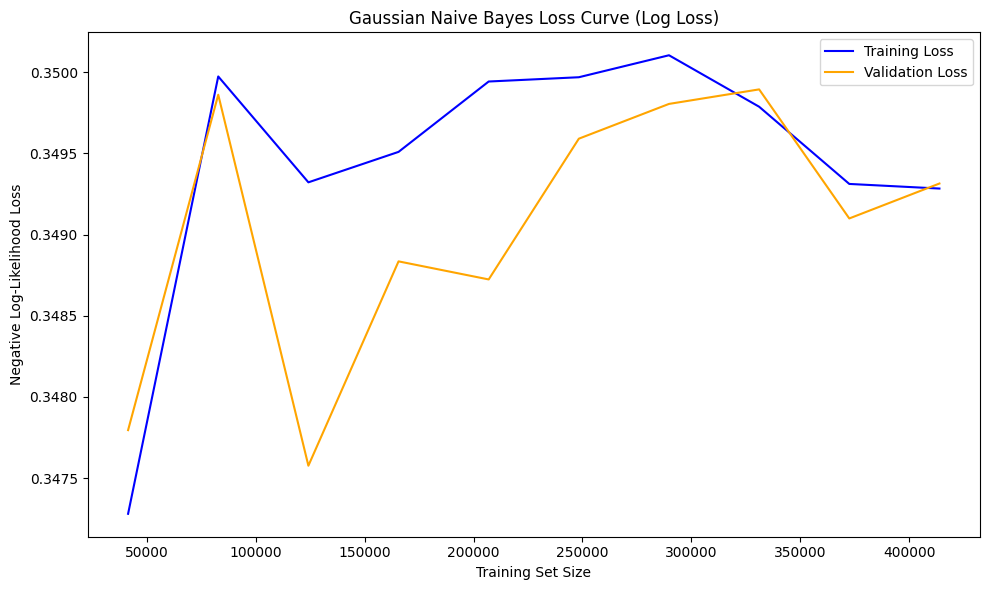

In [ ]:
#  Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import log_loss

#  Step 2: Prepare the Data (assuming you've already defined X and y_adjusted)
# Example split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Step 4: Initialize Gaussian Naive Bayes Model
gnb = GaussianNB()

# Step 5: Compute Learning Curve (using negative log loss)
train_sizes, train_scores, test_scores = learning_curve(
    gnb,
    X_train,
    y_train,
    cv=5,
    scoring="neg_log_loss",  # log loss expects probability predictions
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

#  Step 6: Process and Plot the Learning Curve
# Compute mean log losses (negated to make them positive)
train_mean = -np.mean(train_scores, axis=1)
val_mean = -np.mean(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, '-', label="Training Loss", color='blue')
plt.plot(train_sizes, val_mean, '-', label="Validation Loss", color='orange')
plt.xlabel("Training Set Size")
plt.ylabel("Negative Log-Likelihood Loss")
plt.title("Gaussian Naive Bayes Loss Curve (Log Loss)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


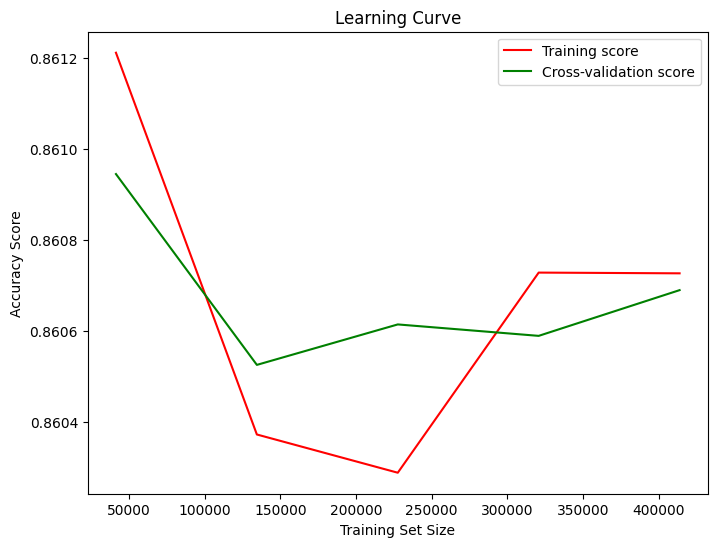

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

#  Define the model
gnb = GaussianNB()

#  Generate learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    gnb, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, '-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, '-', color="g", label="Cross-validation score")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()
